<a href="https://colab.research.google.com/github/Praz98/Assignment-7-EDA-ML/blob/main/T7_SVM_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
     

**Importing the dataset**

In [2]:
datasets = pd.read_csv('/content/Social_Network_Ads.csv')
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values
     

**Splitting the dataset into the Training set and Test set**

In [3]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


**Feature Scaling**

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)
     

**Fitting SVM to the Training set**

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_Train, Y_Train) 

SVC(random_state=0)

**Predicting the Test set results**

In [6]:
y_pred = classifier.predict(X_Test)
     

**Making the Confusion Matrix**

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, y_pred)
     

In [9]:
cm

array([[64,  4],
       [ 3, 29]])

**Visualising the Training set results**

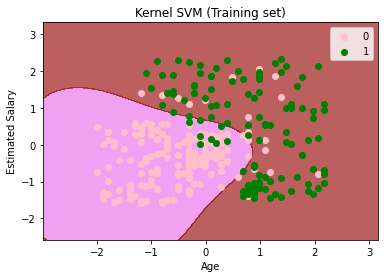

In [8]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('violet', 'brown')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('pink', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
     

**Visualising the Test set results**

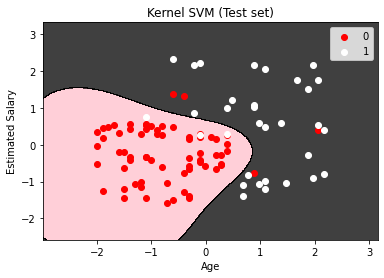

In [10]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'white'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()